In [1]:
#Imports
import numpy as np
import pandas as pd
import tensorflow.keras.backend as k
from sklearn.preprocessing import MinMaxScaler,  RobustScaler
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, losses, regularizers
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber



In [20]:
import numpy as np
import pandas as pd

# Read a specific sheet
df = pd.read_excel(r"C:\Users\William\OneDrive\Documents\Data Cleaning\LARUAN.xlsx",
                   sheet_name='04-VAL04H-PM-1 MIRANDA-PSAN_Pre')

df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,PMP,04-VAL04H-PM-1 MIRANDA-PSAN_Pressure,DATETIME,PSI
6,NaN,NaN,2022-01-01 00:00:00,[-11057] Not Enough Values For Calculation
7,NaN,NaN,2022-01-01 00:15:00,[-11057] Not Enough Values For Calculation
8,NaN,NaN,2022-01-01 00:30:00,[-11057] Not Enough Values For Calculation
9,NaN,NaN,2022-01-01 00:45:00,[-11057] Not Enough Values For Calculation


In [21]:
# Don't use this unless you're gonna change your prv dataset.
# to clean

df.drop(['Unnamed: 1', 'Unnamed: 0'], axis=1, inplace=True)
df.to_csv('semicleaned3.csv', index=False)
df.head(100)

,Unnamed: 2,Unnamed: 3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,2022-01-01 22:15:00,[-11057] Not Enough Values For Calculation
96,2022-01-01 22:30:00,[-11057] Not Enough Values For Calculation
97,2022-01-01 22:45:00,[-11057] Not Enough Values For Calculation
98,2022-01-01 23:00:00,[-11057] Not Enough Values For Calculation


In [22]:
import numpy as np
import pandas as pd
#Cleaning changing Not enough values to NaN
df3 = pd.read_csv("semicleaned3.csv", skiprows=6)
df3.columns = ['DATETIME', 'PSI']
df3.replace('[-11057] Not Enough Values For Calculation', np.nan, inplace=True)
#changing data types

df3['PSI'] = pd.to_numeric(df3['PSI'], errors='coerce')
df3['DATETIME'] = pd.to_datetime(df3['DATETIME'], errors='coerce')
df3.dtypes
df3

,DATETIME,PSI
0,2022-01-01 00:00:00,NaN
1,2022-01-01 00:15:00,NaN
2,2022-01-01 00:30:00,NaN
3,2022-01-01 00:45:00,NaN
4,2022-01-01 01:00:00,NaN
...,...,...
101659,2024-11-24 22:45:00,7.81
101660,2024-11-24 23:00:00,9.23
101661,2024-11-24 23:15:00,9.94
101662,2024-11-24 23:30:00,8.52


In [23]:
df_new = df3.copy()  # Creates a separate copy
df_new.index = df_new['DATETIME']
df_new.drop('DATETIME', axis=1, inplace=True)

df_new




,PSI
DATETIME,
2022-01-01 00:00:00,NaN
2022-01-01 00:15:00,NaN
2022-01-01 00:30:00,NaN
2022-01-01 00:45:00,NaN
2022-01-01 01:00:00,NaN
...,...
2024-11-24 22:45:00,7.81
2024-11-24 23:00:00,9.23
2024-11-24 23:15:00,9.94


In [27]:
#df_new.loc[df_new['PSI'] > 30, 'PSI'] = np.nan
df_new['PSI'] = df_new['PSI'].interpolate(method='time')
df_new['PSI'] = df_new['PSI'].rolling(window=5, center=True).median()

In [28]:
df_new.fillna(0, inplace=True)

df_new
(df_new < 0).sum()


PSI    1009
dtype: int64

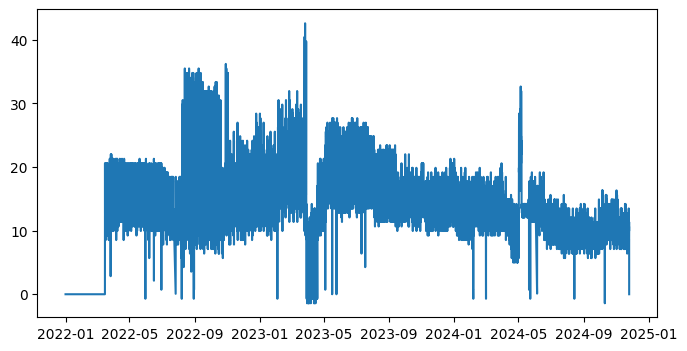

In [29]:
#visualizing my dataframe
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Plot using numerical indices on the x-axis
plt.plot(df_new.index, df_new['PSI'], label='PSI')
# Formatting




In [ ]:
df_new['PSI']




PSI    0
dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
len(df_new)



101664

In [ ]:
#train = df_new.iloc[:98784]
#test = df_new.iloc[98784:]
#train

,PSI
DATETIME,
2022-01-01 00:00:00,0.00
2022-01-01 00:15:00,0.00
2022-01-01 00:30:00,0.00
2022-01-01 00:45:00,0.00
2022-01-01 01:00:00,0.00
...,...
2024-10-25 22:45:00,9.23
2024-10-25 23:00:00,9.23
2024-10-25 23:15:00,9.23


In [ ]:
#len(train)


98784

In [ ]:
#len(test)

2880

In [ ]:
#test

,PSI
DATETIME,
2024-10-26 00:00:00,9.94
2024-10-26 00:15:00,9.94
2024-10-26 00:30:00,9.23
2024-10-26 00:45:00,9.23
2024-10-26 01:00:00,9.94
...,...
2024-11-24 22:45:00,8.52
2024-11-24 23:00:00,8.52
2024-11-24 23:15:00,9.23


In [35]:
scaler.fit(df_new)


MinMaxScaler()

In [36]:
scaled_data = scaler.transform(df_new)


In [38]:

# Function to create sequences while preserving the time series order
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])  # Predicting 'DATA (psi)'
    return np.array(X), np.array(y)

SEQ_LENGTH = 30  # Capture longer-term patterns
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-Test Split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (81307, 30, 1)
X_test shape: (20327, 30, 1)
y_train shape: (81307, 1)
y_test shape: (20327, 1)


In [42]:
#building model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(30, activation='relu'),
    Dense(1)  # Final output
])

# Compile model with Huber loss and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=Huber(delta=1),
    metrics=['mae']
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model checkpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath="best_lstm_modelv8.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/30


c:\Users\William\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5080/5082 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011 - mae: 0.0275
Epoch 1: val_loss improved from inf to 0.00011, saving model to best_lstm_modelv8.keras
5082/5082 ━━━━━━━━━━━━━━━━━━━━ 71s 13ms/step - loss: 0.0011 - mae: 0.0275 - val_loss: 1.0569e-04 - val_mae: 0.0077
Epoch 2/30
5080/5082 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.6304e-04 - mae: 0.0168
Epoch 2: val_loss did not improve from 0.00011
5082/5082 ━━━━━━━━━━━━━━━━━━━━ 116s 23ms/step - loss: 3.6304e-04 - mae: 0.0168 - val_loss: 1.0677e-04 - val_mae: 0.0107
Epoch 3/30
5081/5082 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.5514e-04 - mae: 0.0162
Epoch 3: val_loss did not improve from 0.00011
5082/5082 ━━━━━━━━━━━━━━━━━━━━ 119s 23ms/step - loss: 3.5514e-04 - mae: 0.0162 - val_loss: 2.3050e-04 - val_mae: 0.0181
Epoch 4/30
5081/5082 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3635e-04 - mae: 0.0156
Epoch 4: val_loss did not improve from 0.00011
5082/5082 ━━━━━━━━━━━━━━━━━━━━ 70s 14ms/step - loss: 3.3635e-04 - mae: 0.0156 -

636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


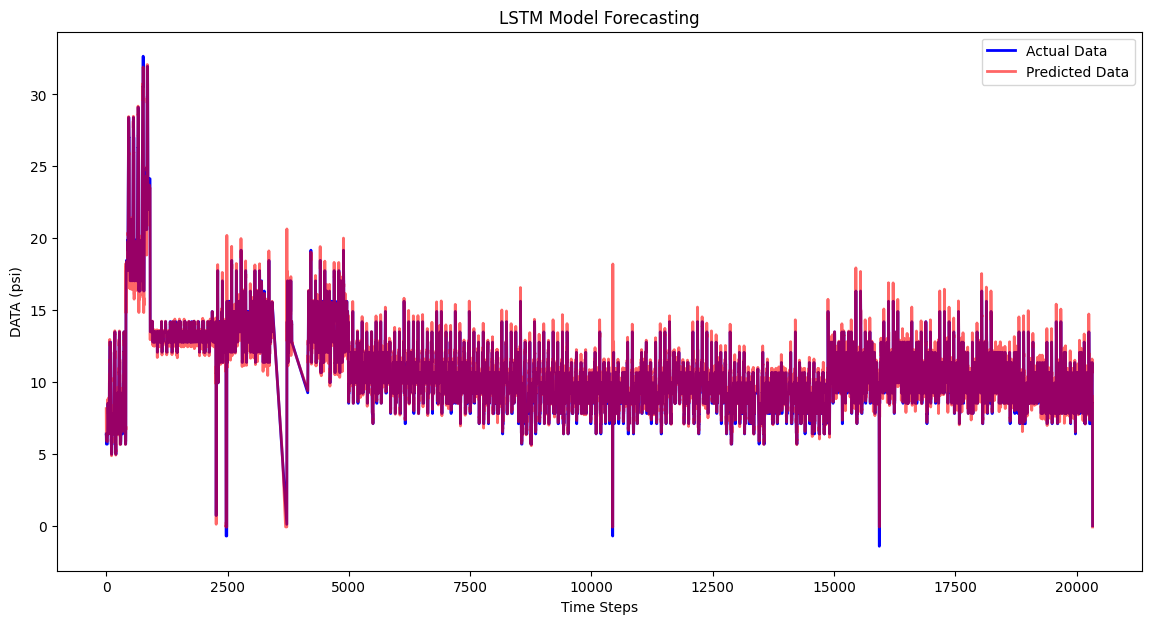

In [45]:
#checking the prediction
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("15minsPredict.keras")

y_pred = best_model.predict(X_test)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

import matplotlib.pyplot as plt
import numpy as np

# Create time indices for plotting
time_index = np.arange(len(y_test_actual))

plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test_actual, label="Actual Data", color="blue", linewidth=2)
plt.plot(time_index, y_pred_actual, label="Predicted Data", color="red", linewidth=2, alpha=0.6)

plt.title("LSTM Model Forecasting")
plt.xlabel("Time Steps")
plt.ylabel("DATA (psi)")
plt.legend()
plt.show()



In [44]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# MAPE function
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

def mape2(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (np.abs((y_true - y_pred) / y_true)).mean() * 100

# Calculate SMAPE
smape_value = smape(y_test_actual, y_pred_actual)
print(f"SMAPE: {smape_value:.2f}%")

accuracy = 100 - smape_value
print(f"Model Accuracy: {accuracy:.2f}%")

# Calculate MAPE
mape_value = mape(y_test_actual, y_pred_actual)
print(f"MAPE: {mape_value:.4f}%")

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f'MAE: {mae:.4f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f'RMSE: {rmse:.4f}')


SMAPE: 3.79%
Model Accuracy: 96.21%
MAPE: inf%
MAE: 0.3290
RMSE: 0.5635


C:\Users\William\AppData\Local\Temp\ipykernel_10252\3278674004.py:10: RuntimeWarning: divide by zero encountered in divide
  return 100 * np.mean(np.abs((y_true - y_pred) / y_true))


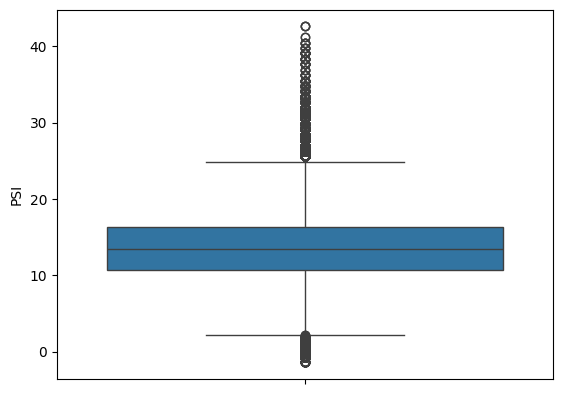

np.int64(0)

In [50]:
sns.boxplot(data=df_new['PSI'])
plt.show()

df_new.isnull().sum().sum()  